# DTSC 5301 Project Coding
## **FOOD WASTE MANAGEMENT**
---

---
Authors/Members

*   anujanil.hundia@colorado.edu        - Anuj Hundia
*   pranit.katwe@colorado.edu           - Pranit Katwe
*   sarthak.katyal@colorado.edu         - Sarthak Katyal
*   shrutisunil.wakchoure@colorado.edu  - Shruti Wakchoure
*   siddhant.sharma@colorado.edu        - Siddhant Sharma
*   junsoo.jung@colorado.edu            - Junsoo Jung

---





## Introduction

In today's world, the rate of population growth is extremely high, and the development of the food chain is also improving rapidly. In May 2015, under the presidency of Turkey, the G20 agriculture ministers highlighted the extent of food loss and waste (FLW) as "a global problem of enormous economic, environmental, and societal significance" and encouraged all G20 members to strengthen their collective efforts to prevent and reduce FLW. However, despite these efforts, significant food waste still occurs due to several reasons. The Food and Agriculture Organization of the United Nations (FAO) is one of the global organizations committed to reducing this issue. FAO's ultimate goal for now is to "halve the per capita global food waste at the retail and consumer level by 2030, and reduce food losses along production and supply chains, including post-harvest losses." Out group is inspired by FAO's efforts and aims to identify which problems related to food waste should be given priority for resolution.



### Goal of this project

Our project aims to reduce unnecessary food waste by identifying and addressing the primary causes of food loss and waste. We will achieve this goal by analyzing data and identifying key contributors to food waste.


### Initial setup

We will start using the following libraries for data analysis and visualization.
Pandas for dataframe usage and data cleaning. Matplotlib and Seaborn for visualization.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

We brought data from Food and Argriculture Organization of United Nations. This database includes data and information from publicly available databases, reports, and studies that measure food loss and waste across food products, stages of the value chain, and geographical areas. FAOUN has made this data available to anyone who wants to learn more about food waste and loss.

Original link to the data : https://www.fao.org/platform-food-loss-waste/flw-data/en/

In [ ]:
#Reading CSV
food_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1h0k2vygma2sihMRTr8PlthgoFGHpZbNpMbAi7cUWlyI/export?format=csv')
food_data

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78000,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77000,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88000,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57000,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65000,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,894,Zambia,NaN,118,Millet,2012,2.50000,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
11830,894,Zambia,NaN,118,Millet,2012,2.61001,2.61001,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
11831,894,Zambia,NaN,118,Millet,2012,1.28543,1.28543,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
11832,894,Zambia,NaN,118,Millet,2012,3.48739,3.48739,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN


### Data cleaning and sorting

In our data analysis project, we concentrated on key and well-known aspects connected to food waste, and as part of our data pretreatment, we deleted unneeded columns to streamline and refine our dataset. Following this data cleansing process, we chose the 'loss_percentage' column as our key focus.


##### Cleaning Methods

It is evident that data in columns like region, loss_quantity, and cause_of_loss are having null values more than the permissable levels ( Considered threshold level as 15% ). As the percentage of null values is very huge, it is better to remove those columns. Thats why we are removing these columns.
*   Reason of removing 'm49_code' : this is country code, which is belongs to column 'country'.
*   Reason of removing 'cpc_code' : this is country code, which is belongs to column 'commodity'.
*   Reason of removing 'method_data_collection' : this is not related to our main column 'loss_percentage'.

In [ ]:
percent_missing = food_data.isnull().sum() * 100 / len(food_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
m49_code,0.000000
country,0.000000
region,94.929863
cpc_code,0.000000
commodity,0.000000
year,0.000000
loss_percentage,0.000000
loss_percentage_original,0.000000
loss_quantity,97.760690
activity,10.520534


This is the cleaned data after removing the columns which were not important for our analysis.

In [ ]:
# Data Cleaning by removing lower priority columns.
food_data.drop(['m49_code','region','cpc_code','treatment','loss_quantity','sample_size','method_data_collection','reference','url','notes'],inplace=True,axis=1)
food_data

,country,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,cause_of_loss
0,Myanmar,"Rice, milled",2015,1.78000,1.78%,Storage,Storage,Rodents
1,Myanmar,"Rice, milled",2015,11.77000,11.77%,Storage,Storage,Rodents
2,Myanmar,"Rice, milled",2015,5.88000,5.88%,Storage,Storage,Rodents
3,Myanmar,"Rice, milled",2015,3.57000,3.57%,Storage,Storage,Rodents
4,Myanmar,"Rice, milled",2015,17.65000,17.65%,Storage,Storage,Rodents
...,...,...,...,...,...,...,...,...
11829,Zambia,Millet,2012,2.50000,2.5,Transportation,Farm,NaN
11830,Zambia,Millet,2012,2.61001,2.61001,Storage,Storage,NaN
11831,Zambia,Millet,2012,1.28543,1.28543,Storage,Farm,NaN
11832,Zambia,Millet,2012,3.48739,3.48739,"Drying, Harvesting",Harvest,NaN


These are all the important columns that we are going to use in our analysis and our visualization for better understanding.

#### 1. Food waste caused by Stage

From the cleaned data, we start with comparing loss percentage and stage.

In [ ]:
stage_loss=food_data[['food_supply_stage','loss_percentage']]
stage_loss

food_data['food_supply_stage'] = food_data['food_supply_stage'].astype(str)

The last line code converts the column data type from object to string.

Becaue there are lots of duplicated items in stage, we get mean value of the each duplicated item.

In [ ]:
mean_stage_loss = stage_loss.groupby(stage_loss['food_supply_stage']).mean()
mean_stage_loss

,loss_percentage
food_supply_stage,
Collector,13.650000
Distribution,5.557059
Export,25.750000
Farm,2.754983
Food Services,7.578333
Grading,9.166667
Harvest,4.867161
Households,11.746667
Market,7.801333


After getting a mean value, we wants to see what is the highest reason of the loss. So, we sorted by order of `loss_percentage`.


In [ ]:
sorted_stage = mean_stage_loss.sort_values(by='loss_percentage',ascending=False)
sorted_stage

,loss_percentage
food_supply_stage,
Export,25.750000
Post-harvest,18.465106
Retail,13.657097
Collector,13.650000
Households,11.746667
Whole supply chain,10.655971
Pre-harvest,9.625000
Grading,9.166667
Market,7.801333


##### Visualization.

To analyze effectivly, we visualize the sorted data. To check which stage has the highest loss percentage where food is getting wasted.

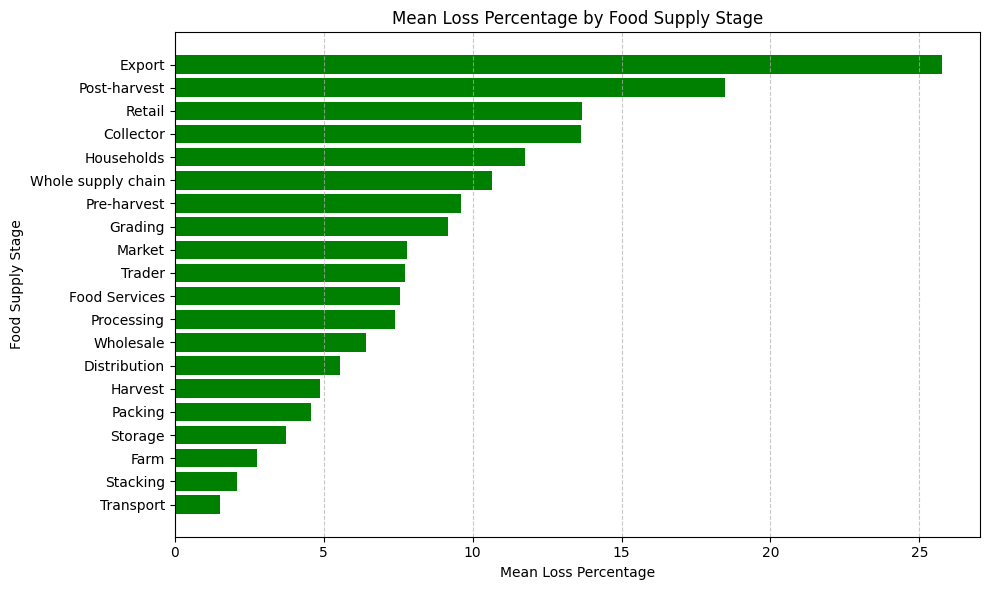

In [ ]:
food_supply_stage = sorted_stage.index
mean_loss_percentages = sorted_stage['loss_percentage']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(food_supply_stage, mean_loss_percentages, color='green')

# Added labels to both axes and title
plt.xlabel('Mean Loss Percentage')
plt.ylabel('Food Supply Stage')
plt.title('Mean Loss Percentage by Food Supply Stage')

# To Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Adjust plot layout for better spacing
plt.tight_layout()

#Invert y-axis to get the highest value on top
plt.gca().invert_yaxis()
plt.show()

#### 2. Food waste caused by Year

Here we start with comparing loss percentage and year by taking two columns `year` and `loss_percentage`.

In [ ]:
year_loss=food_data[['year','loss_percentage']]
year_loss

,year,loss_percentage
0,2015,1.78000
1,2015,11.77000
2,2015,5.88000
3,2015,3.57000
4,2015,17.65000
...,...,...
11829,2012,2.50000
11830,2012,2.61001
11831,2012,1.28543
11832,2012,3.48739


Here we will take mean of each year of loss percentage to represent the mean loss percentage of each year.

In [ ]:
mean_year_loss = year_loss.groupby(year_loss['year']).mean()
mean_year_loss

,loss_percentage
year,
2012,4.582203
2013,5.984491
2014,3.637707
2015,4.614324
2016,3.999793
2017,4.191239
2018,4.746583
2019,3.205324
2020,2.859917


Now we will sort this value from highest to lowest using `loss_percentage` and by using `ascending=False`

In [ ]:
sorted_year = mean_year_loss.sort_values(by='loss_percentage',ascending=False)
sorted_year

,loss_percentage
year,
2022,8.217000
2013,5.984491
2018,4.746583
2015,4.614324
2012,4.582203
2017,4.191239
2016,3.999793
2014,3.637707
2019,3.205324


##### Visualization.

Here we plot the the value of mean loss percentage of each year with sorted data. We can see that 2022 has the highest mean loss percentage.


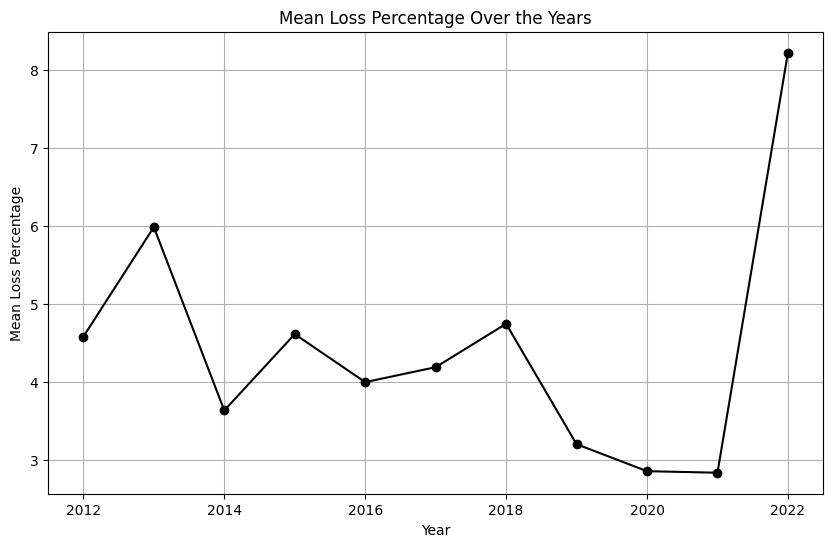

In [ ]:
#visualization here
years = sorted_year.index
mean_loss_percentages = sorted_year['loss_percentage']

years = mean_year_loss.index
mean_loss_percentages = mean_year_loss['loss_percentage']

# Create a line plot usking marker and linestyle
plt.figure(figsize=(10, 6))
plt.plot(years, mean_loss_percentages, marker='o', linestyle='-', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage Over the Years')

# Show the plot
# Add grid lines
plt.grid(True)
plt.show()

#### 3. Food waste caused by Country

Here we start with comparing loss percentage by country by taking two columns `country` and `loss_percentage`.

In [ ]:
country_loss=food_data[['country','loss_percentage']]
country_loss

,country,loss_percentage
0,Myanmar,1.78000
1,Myanmar,11.77000
2,Myanmar,5.88000
3,Myanmar,3.57000
4,Myanmar,17.65000
...,...,...
11829,Zambia,2.50000
11830,Zambia,2.61001
11831,Zambia,1.28543
11832,Zambia,3.48739


Here we will take mean of country to avoid duplicates. So we will get one value for each country for better visulization.

In [ ]:
mean_country_loss = country_loss.groupby(country_loss['country']).mean()
mean_country_loss

,loss_percentage
country,
Angola,2.515144
Argentina,0.503077
Armenia,5.050000
Australia,18.402326
Australia and New Zealand,42.000000
...,...
United States of America,11.388772
Venezuela (Bolivarian Republic of),37.000000
Viet Nam,9.425000


Now we will sort this value from highest to lowest using `loss_percentage` and by using `ascending=False`

In [ ]:
sorted_country = mean_country_loss.sort_values(by='loss_percentage',ascending=False)
sorted_country

,loss_percentage
country,
Australia and New Zealand,42.000000
Venezuela (Bolivarian Republic of),37.000000
Gabon,35.000000
Canada,30.500000
Saint Kitts and Nevis,30.000000
...,...
Liberia,2.371892
Botswana,2.368111
Namibia,2.192316


Here we can see a table with 105 countries and their mean loss percentage. We cannot plot the table for 105 countries. So we will plot the top 20 countries.

##### Visualization

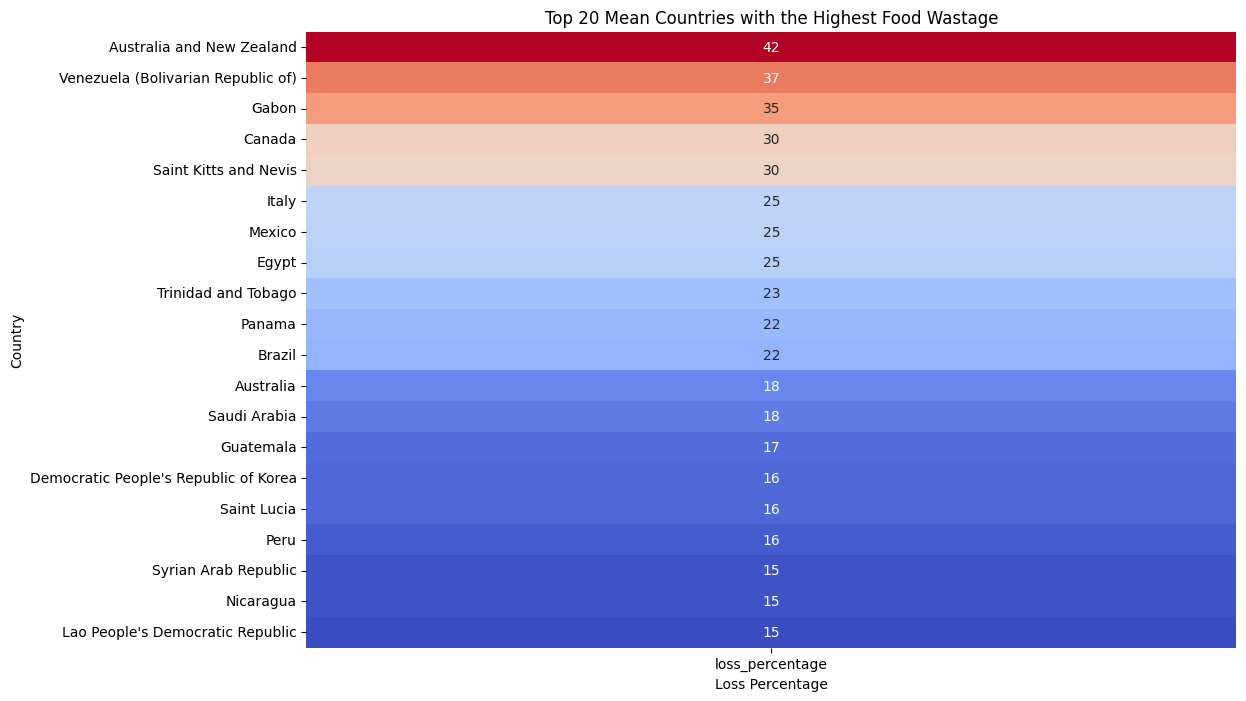

In [ ]:
#We want to see the top 20 countries so we will create a new dataframe for that
top_20_countries = sorted_country.head(20)

# Create a heatmap with values for the top 20 countries
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_countries[['loss_percentage']], annot=True, cmap="coolwarm", cbar=False)

# Add labels and title
plt.xlabel('Loss Percentage')
plt.ylabel('Country')
plt.title('Top 20 Mean Countries with the Highest Food Wastage')

# Show the plot
plt.show()

#### 4. Food waste caused by Commodity

In this case we will take the `commodity` and `loss_percentage`. With this two columns, we will get the mean loss percentage of each commodity

In [ ]:
commodity_loss=food_data[['commodity','loss_percentage']]
commodity_loss

,commodity,loss_percentage
0,"Rice, milled",1.78000
1,"Rice, milled",11.77000
2,"Rice, milled",5.88000
3,"Rice, milled",3.57000
4,"Rice, milled",17.65000
...,...,...
11829,Millet,2.50000
11830,Millet,2.61001
11831,Millet,1.28543
11832,Millet,3.48739


Here we will take the mean of each commodity to represent the mean loss percentage of each commodity. With this we will get 130 rows but we want to see the top 10 commodities with the highest mean loss percentage. And there are some names in this commodity column which we don't want to show in the visualization. So we will rename them because they are not looking good in the visualization.

In [ ]:
mean_commodity_loss = commodity_loss.groupby(commodity_loss['commodity']).mean()
mean_commodity_loss = mean_commodity_loss.rename(index={'Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails' : 'Snails, except sea snails'})
mean_commodity_loss = mean_commodity_loss.rename(index={'Meat of pig with the bone, fresh or chilled' : 'Pork with bones'})
mean_commodity_loss

,loss_percentage
commodity,
"Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",1.779375
Apple juice,26.666700
Apples,7.251452
Apricots,11.625000
Areca nuts,1.563684
...,...
"Walnuts, in shell",1.400000
Watermelons,14.155556
Wheat,3.636016


Here we will sort this value from highest to lowest using `loss_percentage` and by using `ascending=False` and display the top 10.

In [ ]:
sorted_commodity = mean_commodity_loss.sort_values(by='loss_percentage',ascending=False)

In [ ]:
sorted_commodity.head(10)

,loss_percentage
commodity,
"Snails, except sea snails",50.000000
Grapefruit juice,44.999350
Orange juice,43.916843
Pineapple juice,41.333300
Pork with bones,40.910000
Canned mushrooms,35.000000
Plantains and cooking bananas,30.241667
Cocoa beans,30.000000
"Broad beans and horse beans, green",30.000000


##### Visualization.

This visualization shows the top 10 commodities with the highest mean loss percentage. We can see Snails, except sea snails has the highest mean loss percentage and Sweet corn, frozen has the lowest mean loss percentage.

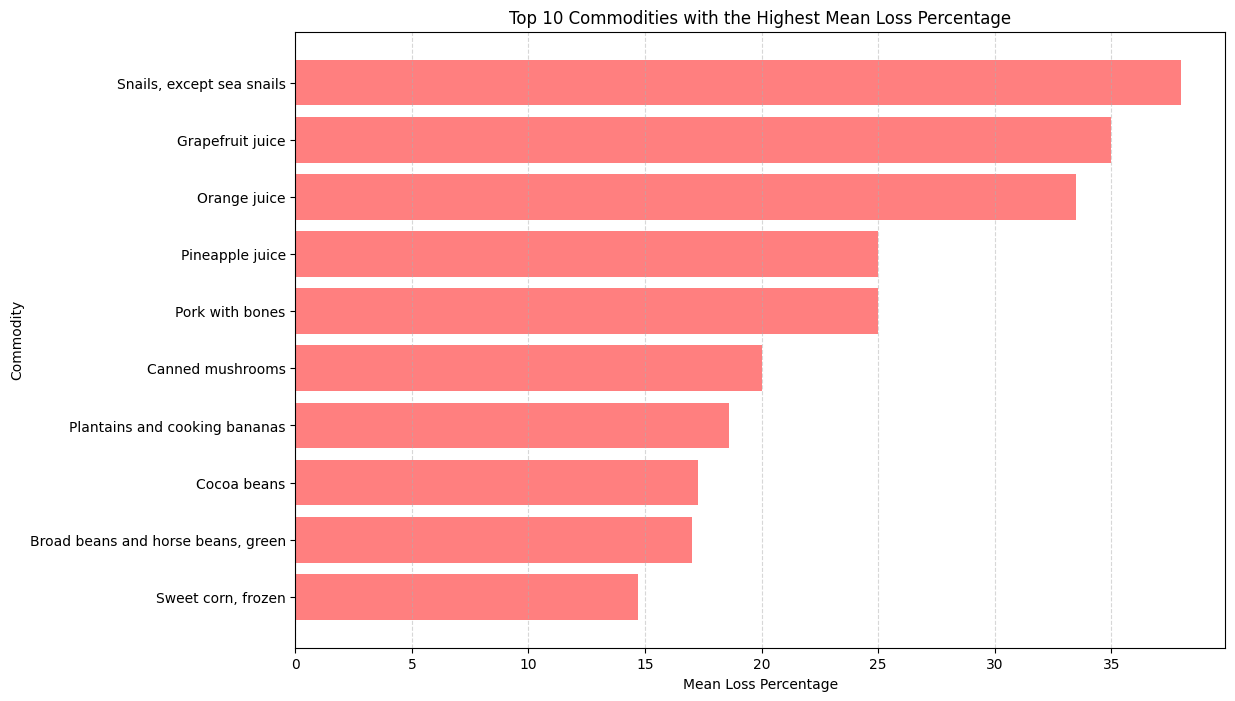

In [ ]:
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size
items = sorted_commodity.head(10).index
plt.barh(items, mean_loss_percentages, color='red',alpha=0.5)

# Add labels and title
plt.xlabel('Mean Loss Percentage')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities with the Highest Mean Loss Percentage')

# Show the plot
# Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.show()

#### 5. Food waste caused by activity

In this section, we want to see which activity has the highest number of waste. To analyze we will take the `activity` and `loss_percentage`

In [ ]:
activity_loss=food_data[['activity','loss_percentage']]
activity_loss

,activity,loss_percentage
0,Storage,1.78000
1,Storage,11.77000
2,Storage,5.88000
3,Storage,3.57000
4,Storage,17.65000
...,...,...
11829,Transportation,2.50000
11830,Storage,2.61001
11831,Storage,1.28543
11832,"Drying, Harvesting",3.48739


We will take the mean of each activity to avoid the duplication.

In [ ]:
mean_activity_loss = activity_loss.groupby(activity_loss['activity']).mean()
mean_activity_loss

,loss_percentage
activity,
"Bagging, Cleaning, Collection, Distribution, Drying, Field, Handling, Harvesting, Sorting, Storage, Threshing",25.000000
"Blanching, Cleaning, Freezing, Sorting",17.000000
"Bulking, Distribution",1.400000
Bundling,3.980000
Cleaning,4.530000
...,...
Threshing,2.890645
Trading,3.300000
Transportation,1.880330


Here we will sort the above value from highest to lowest using `loss_percentage` and by using `ascending=False` like we did in the previous sections.

In [ ]:
sorted_activity = mean_activity_loss.sort_values(by='loss_percentage',ascending=False)
sorted_activity


,loss_percentage
activity,
"Farm, Marketing, Storage, Transportation",38.000000
"Milling, Storage",35.000000
"Sorting, Washing",33.500000
"Bagging, Cleaning, Collection, Distribution, Drying, Field, Handling, Harvesting, Sorting, Storage, Threshing",25.000000
"Marketing, Retailing",25.000000
...,...
"Handling, Trading, Transportation",0.613333
"Distribution, Trading",0.590000
"Collection, Farm",0.578333


We here now create a dataframe with the top 10 activities with the highest mean loss percentage. And we will rename a few activities because they are not looking good in the visualization.

In [ ]:
top_10_activity = sorted_activity.head(10)
top_10_activity = top_10_activity.rename(index={'Bagging, Cleaning, Collection, Distribution, Drying, Field, Handling, Harvesting, Sorting, Storage, Threshing' : 'Bagging, Cleaning, Storage, etc'})
top_10_activity

,loss_percentage
activity,
"Farm, Marketing, Storage, Transportation",38.000000
"Milling, Storage",35.000000
"Sorting, Washing",33.500000
"Bagging, Cleaning, Storage, etc",25.000000
"Marketing, Retailing",25.000000
Ripening,20.000000
"Marketing, Storage",18.590000
"Farm, Manufacturing, Transportation",17.291667
"Blanching, Cleaning, Freezing, Sorting",17.000000


##### Visualizaton.

This visualization shows the top 10 activities with the highest mean loss percentage. There are multiple activities with the same mean loss percentage.

<Figure size 1200x800 with 0 Axes>

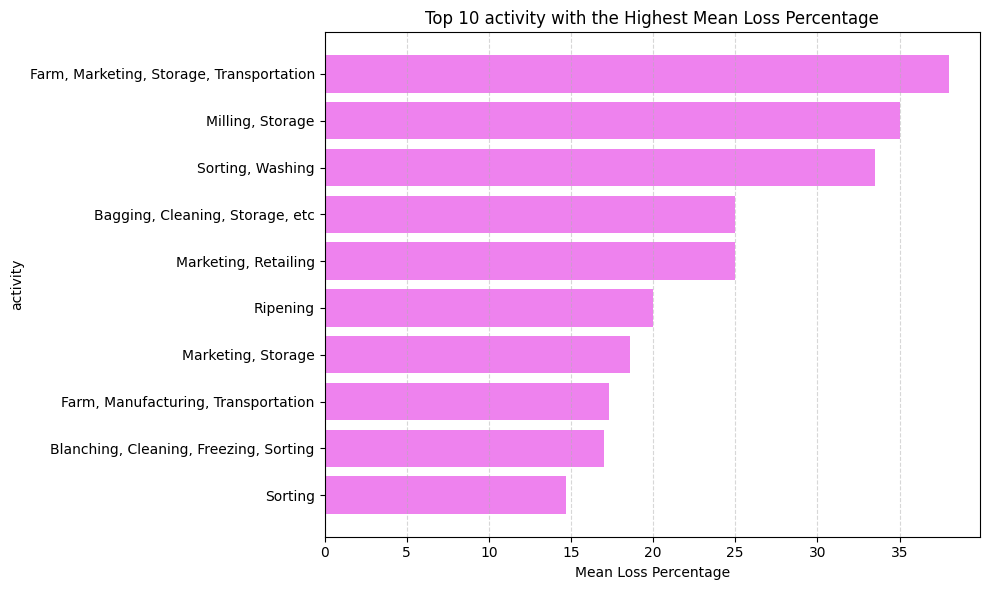

In [ ]:
plt.figure(figsize=(12, 8))
# Extract the index (countries) and mean loss percentages for the top 10 countries
activities = top_10_activity.index
mean_loss_percentages = top_10_activity['loss_percentage']

# Create a horizontal bar chart for the top 10 countries
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.barh(activities, mean_loss_percentages, color='violet')

# Add labels and title
plt.xlabel('Mean Loss Percentage')
plt.ylabel('activity')
plt.title('Top 10 activity with the Highest Mean Loss Percentage')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# For HTML generate
%%shell
jupyter nbconvert DTSC5301_project.ipynb --to html

[NbConvertApp] WARNING | pattern 'DTSC5301_project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

CalledProcessError: ignored